In [11]:
# set the autoreload and the inline plotting for matplotlib
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# download
import requests
import json

# data manipulation
import numpy as np
import numpy.ma as ma

# geometry manipulation
import geopandas as gpd
import shapely.geometry
import shapely.wkt
from shapely.geometry import Point, MultiPolygon, Polygon

# image manipulation
import skimage.feature
import skimage.filters
import skimage.morphology
import rasterio




# Sentinel Hub
#from sentinelhub import BBox, CRS
from sentinelhub import *

#from pyproj import *
#CRS("ESRI:54009")

# eo-learn related
from eolearn.core import EOTask, LinearWorkflow, FeatureType
from eolearn.io import S2L1CWCSInput
from eolearn.mask import AddCloudMaskTask, AddValidDataMaskTask, get_s2_pixel_cloud_detector
from eolearn.geometry import VectorToRaster

# plotting
import matplotlib
import matplotlib.patheffects
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

rasterio.crs.CRS.from_string("epsg:28992")
rasterio.crs.CRS.from_epsg(28992)

CRS.from_epsg(28992)

In [12]:
WATERBODY_ID = 8103

In [24]:
def get_nominal_geometry(waterbody_id):
    """ A function for obtaining the nominal water geometry from the water observatory API
    """
    with open('Reserviour.json') as f:
        data = json.load(f)
    wb_url = f'https://water.blue-dot-observatory.com/api/waterbodies/{waterbody_id}/index.html'
    wb_data = requests.get(wb_url).json()
    
    return shapely.geometry.shape(data['features']['0']['geometry']['coordinates'])
    #return shapely.geometry.shape(wb_data['nominal_outline']['geometry'])


def plot_geometry(geom, ax=None, **kwargs):
    """ An utility function for plotting the geometry 
    """
    if geom is None or geom.exterior is None:
        return

    x,y = geom.exterior.xy
    if ax is None:
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111)
        
    ax.plot(x, y, **kwargs)

In [23]:
nominal_geometry = get_nominal_geometry(WATERBODY_ID)
print(nominal_geometry)
plot_geometry(nominal_geometry)

KeyError: 'features'

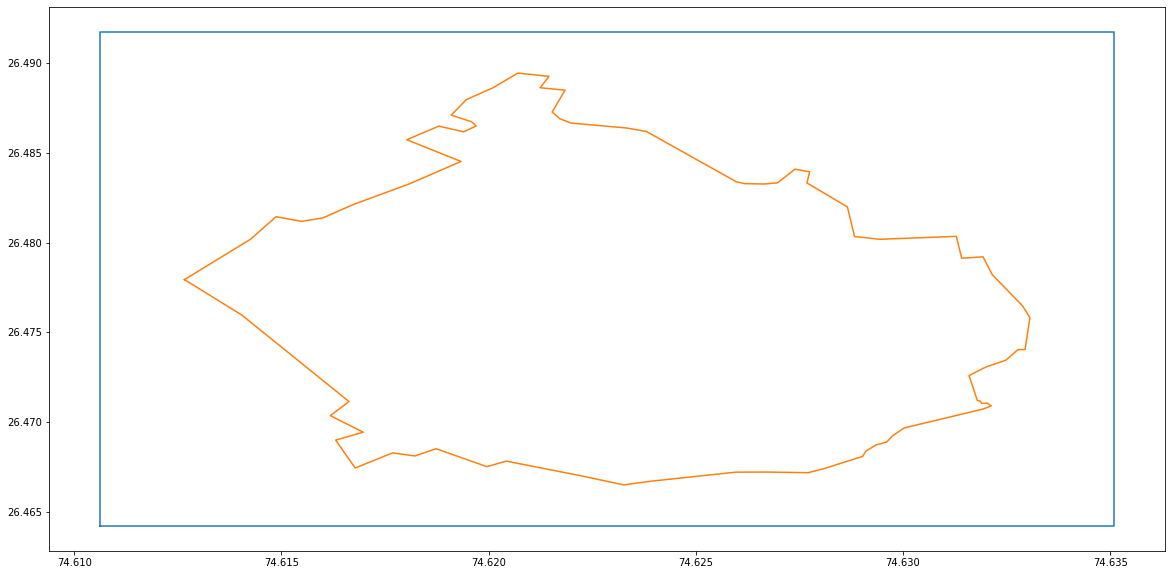

In [15]:
wb_bbox = BBox(nominal_geometry.bounds, crs=CRS.WGS84).buffer(0.2)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plot_geometry(wb_bbox.geometry, ax)
plot_geometry(nominal_geometry, ax)